In [107]:
import pandas as pd

def load_some_data(path, separ = ','):
    return pd.read_csv(path, sep=separ, parse_dates = ['datetime'], index_col = 'datetime')

events_battle = load_some_data(r'data/events_battle.txt')
events_hero = load_some_data(r'data/events_hero.txt')
events_level = load_some_data(r'data/events_level.txt', '\t')
events_payment = pd.read_csv(r'data/events_payment.txt', parse_dates = ['created'], index_col='created')
events_quest = load_some_data(r'data/events_quest.txt')
events_resource = load_some_data(r'data/events_resource.txt')
events_user = load_some_data(r'data/events_user.txt')

In [2]:
# Распределение причин перемещения ресурсов
def get_move_reason_distribution():
    reasons = events_resource.groupby('reason').agg('count')
    reasons['count'] = reasons['total']
    reasons = reasons[['count']]
    return reasons
    
get_move_reason_distribution()

,count
reason,
bot-loot,280708
chest,70558
city-clan-storage,1762
clan,1236
clan-greeting,1793
craft,7437
crystal-exchange-to-chest,628
crystal-exchange-to-gold,13
daily-tasks,4041


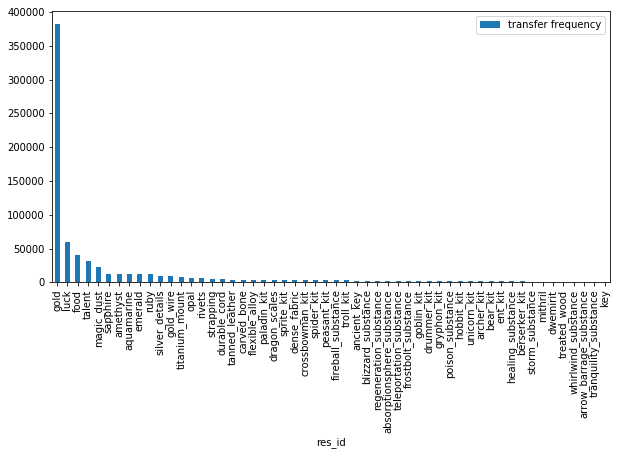

In [61]:
# Список типов ресурсов
def get_resource_types():
    groups = events_resource.groupby('res_id').count()
    groups['transfer frequency'] = groups['id']
    groups = groups[['transfer frequency']]
    return groups.sort_values(by='transfer frequency', ascending=False)

get_resource_types().plot.bar(figsize=(10,5))

In [22]:
# Среднее изменение количества ресурса в день
def get_average_resource_change(resource_name):
    changes = events_resource.loc[events_resource['res_id'] == resource_name]
    changes = changes.groupby(['user_id', changes.index.date]).agg('sum')[['total']]
    changes = changes.groupby('user_id').agg('mean')
    return changes

# Изменение количества ресурса для каждого игрока за весь период
def get_total_resource_change(resource_name):
    changes = events_resource.loc[events_resource['res_id'] == resource_name]
    changes = changes.groupby('user_id').agg('sum')[['total']]
    return changes

get_total_resource_change('talent')

,total
user_id,
001a3472-44bc-4583-95d9-bf8759085017,3
002bcd7d-83b1-42ac-b257-ed71a4585f5e,22
0030c0b3-9683-41c0-bcac-b2aad03759f4,53
003c3099-4382-4f86-a989-a847628894f0,20
0047e219-202a-4eda-8d31-b35a58f50eec,33
0049d114-1c4f-4d9e-afce-bf2bc533eb80,15
005edcb0-0a6a-4051-98c8-36363a59925d,3
00695cdd-d981-4e2c-ad82-f86059a0013d,3
00a21109-ed6d-4be2-8e20-b79158da28b8,0


In [5]:
# Среднее изменение количества кристаллов в день
def get_average_crystal_change():
    changes = events_payment
    changes = changes.groupby(['user_id', changes.index.date]).agg('sum')[['total']]
    changes = changes.groupby('user_id').agg('mean')
    return changes

# Изменение количества кристаллов для каждого игрока за весь период
def get_total_crystal_change():
    changes = events_payment
    changes = changes.groupby('user_id').agg('sum')[['total']]
    return changes

get_average_crystal_change()

,total
user_id,
09b95865-12dd-4bb0-8e0e-1940eac8f00e,1.400000
0bb8fded-6c23-4d9d-b3d3-03ec291539d3,57.250000
0d0325b5-1049-4bfc-a182-b06dc52ba19c,4.000000
1b4bfc72-12e2-4a32-97aa-bbb98c9d6af2,32.000000
1e58c081-6750-4b51-88ff-2f0fc93fe5b3,915.600000
28727c9d-1c93-4df8-8b9c-9f86a87fab7d,0.000000
2aae0bfa-14bf-4dc1-85ad-364fa305d86c,0.500000
2b91bfae-6008-4bf8-bf45-9836d2edef15,0.615385
30353253-4133-47a9-b01b-3e48fd992d80,334.000000


In [62]:
move_reasons = get_move_reason_distribution()

values = [
    get_average_crystal_change()['total'], 
    get_total_crystal_change()['total'],
    get_total_resource_change('gold')['total'],
    get_average_resource_change('gold')['total'],
    get_total_resource_change('food')['total'],
    get_average_resource_change('food')['total'],
    get_average_resource_change('luck')['total'],
    get_total_resource_change('talent')['total']
]

resource_changes = pd.concat(values,
          keys=['average_crystal_change', 'total_crystal change', 
                'total gold change', 'average gold change',
                'total food change', 'average food change',
                'average luck change', 'total talent change'],
          axis=1,
          sort=True)

resource_changes = resource_changes.fillna(0)
resource_changes

,average_crystal_change,total_crystal change,total gold change,average gold change,total food change,average food change,average luck change,total talent change
00040422-b869-4272-ba05-1cc9481037c9,0.0,0.0,2500,2500.000000,0.0,0.000000,0.000000,0.0
001a3472-44bc-4583-95d9-bf8759085017,0.0,0.0,10093,2523.250000,11.0,3.666667,11.000000,3.0
002bcd7d-83b1-42ac-b257-ed71a4585f5e,0.0,0.0,74166,18541.500000,6.0,2.000000,9.000000,22.0
0030c0b3-9683-41c0-bcac-b2aad03759f4,0.0,0.0,29565,9855.000000,18.0,6.000000,0.000000,53.0
003c3099-4382-4f86-a989-a847628894f0,0.0,0.0,4692,2346.000000,5.0,5.000000,0.000000,20.0
00467ba2-b71c-4a69-b8bc-d7491cf2eca0,0.0,0.0,2260,2260.000000,0.0,0.000000,0.000000,0.0
0047e219-202a-4eda-8d31-b35a58f50eec,0.0,0.0,94877,47438.500000,54.0,27.000000,6.000000,33.0
0049d114-1c4f-4d9e-afce-bf2bc533eb80,0.0,0.0,3373,3373.000000,5.0,5.000000,0.000000,15.0
0050299f-36f8-4d38-87c6-bf4e2d305b28,0.0,0.0,2500,2500.000000,0.0,0.000000,0.000000,0.0
005edcb0-0a6a-4051-98c8-36363a59925d,0.0,0.0,52037,17345.666667,11.0,11.000000,4.666667,3.0


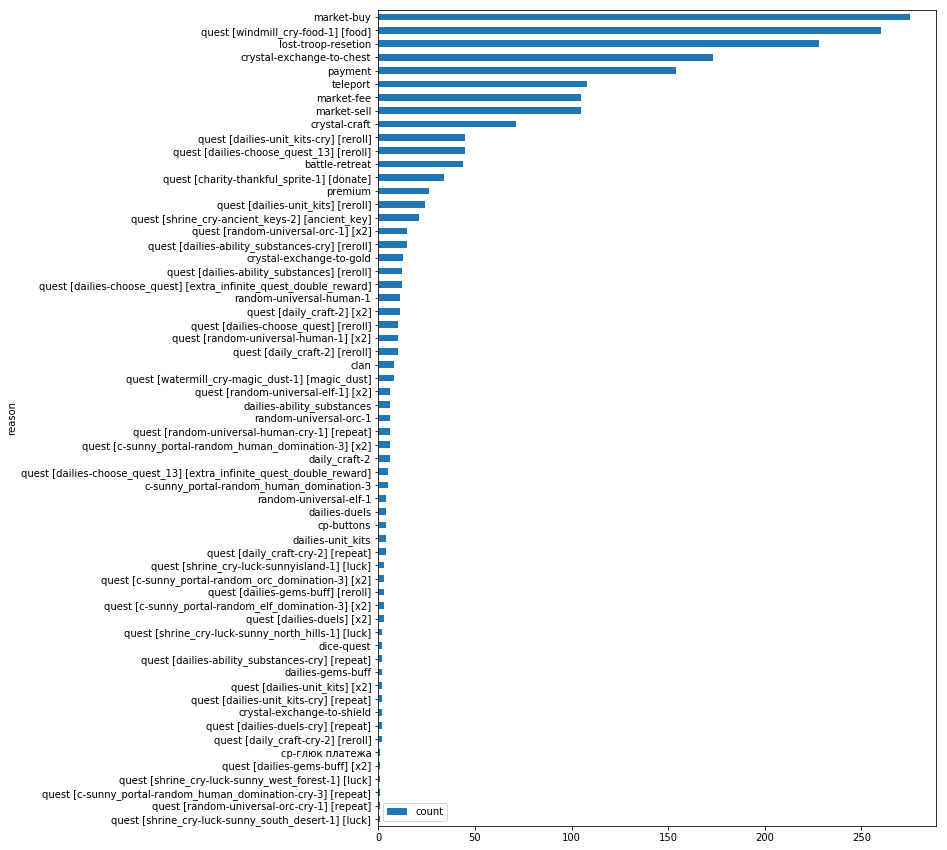

In [99]:
def rank_payment_reasons():
    reasons = events_payment.groupby('reason').count()
    reasons['count'] = reasons['crystal_payment_id']
    return reasons[['count']].sort_values(by='count')
    
rank_payment_reasons().plot.barh(figsize=(10, 15))

In [100]:
def get_min_max_total(reason):
    transactions = events_payment.loc[events_payment['reason'] == 'market-buy']
    return market_buys['total'].min(), market_buys['total'].max()

print(get_min_max_total('market-buy'))
print(get_min_max_total('payment'))

(125, 12500)
(125, 12500)


In [105]:
def get_players_winrates(df):
    win = df.loc[df['status'] == 'win'][['user_id','status']].groupby('user_id').agg('count')
    tot = df[['user_id','status']].groupby('user_id').agg('count')
    return (win/tot).fillna(0)

get_players_winrates(events_battle)

,status
user_id,
00040422-b869-4272-ba05-1cc9481037c9,0.666667
001a3472-44bc-4583-95d9-bf8759085017,0.906977
002bcd7d-83b1-42ac-b257-ed71a4585f5e,0.960000
0030c0b3-9683-41c0-bcac-b2aad03759f4,1.000000
003c3099-4382-4f86-a989-a847628894f0,0.750000
00467ba2-b71c-4a69-b8bc-d7491cf2eca0,0.333333
0047e219-202a-4eda-8d31-b35a58f50eec,0.979167
0049abe6-cc01-4c40-add7-ea480abcb0c4,0.666667
0049d114-1c4f-4d9e-afce-bf2bc533eb80,0.750000


In [116]:
def get_donators():
    return events_payment['user_id'].unique()

In [139]:
def get_labels():
    used_cols = ['user_id']
    all_dates = events_battle[used_cols]
    all_dates = all_dates.append(events_resource[used_cols])
    all_dates = all_dates.append(events_quest[used_cols])
    all_dates = all_dates.append(events_payment[used_cols])
    last_dates = all_dates.reset_index().set_index(['user_id']).groupby(['user_id']).agg('max')
    last_dates.rename(index=str, columns={"index": "datetime"}, inplace = True)
    def is_leaved(date):
        current_date = pd.Timestamp(2018, 11, 8, 12)
        if (current_date - date).days > 3:
            return 1
        else:
            return 0
    last_dates['leaved'] = last_dates.apply(lambda dat : is_leaved(dat['datetime']),axis = 1)
    last_dates=last_dates[['leaved']]
    return last_dates

l = get_labels()
l = l.loc[l['leaved'] == 1]
l = l.reindex(get_donators()).dropna()
l

,leaved
user_id,
429debb5-573d-431c-9a95-3fcd19406758,1.0
d5659882-6b77-41c5-ad88-bb3e519f880b,1.0
52e482a4-20c1-459c-873d-f28f6e4f3e16,1.0
fba3e446-8621-4f11-94a9-e779ebb756be,1.0
b4d1e960-0b93-4313-969a-1226bbff6e9f,1.0
6df1930b-55c0-43c7-8f20-adaacc5f6e39,1.0
2aae0bfa-14bf-4dc1-85ad-364fa305d86c,1.0
698cdfcd-8c67-4e1b-b437-7592ecee9f5f,1.0
7a33156f-c3a2-45ca-b56a-53396b16b7c0,1.0
